# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [4]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [5]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [6]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.00046677589416503905 (+/- 0.00011399573919867105)
avg score time : 0.0006638526916503906 (+/- 5.781040454412449e-05)
avg test score : 0.96 (+/- 0.024944382578492935)


In [7]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.00663142204284668 (+/- 0.00014811174671109877)
avg score time : 0.0023138046264648436 (+/- 0.0001736870692355251)
avg test score : 0.9466666666666667 (+/- 0.04521553322083511)


##### 와인 데이터

In [8]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [9]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.00047926902770996095 (+/- 0.00014827146965293073)
avg score time : 0.0007113933563232422 (+/- 4.4140391024775406e-05)
avg test score : 0.9493650793650794 (+/- 0.037910929811115976)


In [10]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.007098865509033203 (+/- 0.0005941199717496691)
avg score time : 0.0024253368377685548 (+/- 7.1641764045619e-05)
avg test score : 0.9496825396825397 (+/- 0.04428713657612523)


##### 유방암 데이터

In [11]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [12]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.0006194591522216796 (+/- 8.557525348731005e-05)
avg score time : 0.007991552352905273 (+/- 0.0032551314082841566)
avg test score : 0.9648501785437045 (+/- 0.009609970350036127)


In [13]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.007300901412963867 (+/- 0.00021901501823318612)
avg score time : 0.0057353973388671875 (+/- 0.0002932895856927691)
avg test score : 0.9525384257102936 (+/- 0.014288271344313564)


#### SVC

##### 붓꽃 데이터

In [14]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [15]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.0006686687469482422 (+/- 6.926223454206165e-05)
avg score time : 0.0002422332763671875 (+/- 5.692465138741933e-05)
avg test score : 0.9666666666666666 (+/- 0.02108185106778919)


In [16]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.014164161682128907 (+/- 0.0010023886440558266)
avg score time : 0.004321432113647461 (+/- 0.00015961297486033322)
avg test score : 0.9683900015525537 (+/- 0.013095532590146609)


##### 와인 데이터

In [17]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [18]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.0007236003875732422 (+/- 0.00015621290101758268)
avg score time : 0.00021920204162597656 (+/- 1.9899940592184178e-05)
avg test score : 0.9833333333333334 (+/- 0.022222222222222233)


In [19]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.009865427017211914 (+/- 0.000788321282643619)
avg score time : 0.0013907432556152343 (+/- 4.554765907331146e-05)
avg test score : 0.9663492063492063 (+/- 0.0109581305359322)


##### 유방암 데이터

In [20]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [21]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.001786041259765625 (+/- 6.804558139172527e-05)
avg score time : 0.0006872177124023438 (+/- 1.9473179528705753e-05)
avg test score : 0.9736376339077782 (+/- 0.014678541667933545)


In [22]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.013214826583862305 (+/- 0.0008849205725423934)
avg score time : 0.004121065139770508 (+/- 0.00013052479827876817)
avg test score : 0.9631113181183046 (+/- 0.012854302909333468)


#### Decision Tree

##### 붓꽃 데이터

In [23]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [24]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.00047121047973632815 (+/- 0.0002034875182943484)
avg score time : 0.0001227855682373047 (+/- 2.5059596050348908e-05)
avg test score : 0.9533333333333334 (+/- 0.03399346342395189)


In [25]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.008451604843139648 (+/- 0.0008265875050249921)
avg score time : 0.0006665706634521485 (+/- 4.834089411993571e-05)
avg test score : 0.9466666666666667 (+/- 0.039999999999999994)


##### 와인 데이터

In [26]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [27]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.0008285999298095703 (+/- 0.00028468231041132774)
avg score time : 0.00014429092407226564 (+/- 5.082766503293816e-05)
avg test score : 0.8931746031746031 (+/- 0.04124419227384009)


In [28]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.00904850959777832 (+/- 0.0007036101788182974)
avg score time : 0.0007098674774169922 (+/- 3.565983258099155e-05)
avg test score : 0.9719047619047618 (+/- 0.025205629512735514)


##### 유방암 데이터

In [29]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [30]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.0043830394744873045 (+/- 0.0003197114525325432)
avg score time : 0.00024862289428710936 (+/- 7.571948862450151e-05)
avg test score : 0.9156342182890856 (+/- 0.016305911758910666)


In [31]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.014297819137573243 (+/- 0.0004687518962077317)
avg score time : 0.0007755756378173828 (+/- 4.816527390711379e-05)
avg test score : 0.9561092997981679 (+/- 0.01917587033296461)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [32]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [33]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [34]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.0005565166473388671 (+/- 0.00023149579225488858)
avg score time : 0.0005901813507080078 (+/- 7.938624112159284e-05)
avg test score : 0.47357748833823543 (+/- 0.13243123464477455)


In [35]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.006714153289794922 (+/- 0.0006308833553681515)
avg score time : 0.003120279312133789 (+/- 0.0002152749780426422)
avg test score : 0.43518511975342233 (+/- 0.13877613129585323)


##### 당뇨병 데이터

In [36]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [37]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.0005021572113037109 (+/- 0.00020437473121349219)
avg score time : 0.0005678653717041016 (+/- 6.0034044400074744e-05)
avg test score : 0.3689720650295623 (+/- 0.044659049060165365)


In [38]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.006580638885498047 (+/- 0.000666380455753889)
avg score time : 0.0029415607452392576 (+/- 0.0003247362364926281)
avg test score : 0.39812529148876197 (+/- 0.05667482690236365)


#### SVR

##### 보스턴 주택 가격 데이터

In [39]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [40]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.004419946670532226 (+/- 0.00031382020970657163)
avg score time : 0.001684284210205078 (+/- 0.0001219822334873864)
avg test score : 0.17631266230186604 (+/- 0.522491491512898)


In [41]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.015502023696899413 (+/- 0.0007630075841523685)
avg score time : 0.00754694938659668 (+/- 0.00022239091048969413)
avg test score : 0.16315249350987646 (+/- 0.2718610367384817)


##### 당뇨병 데이터

In [42]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [43]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.0030000686645507814 (+/- 0.0001665385023436923)
avg score time : 0.0012916088104248046 (+/- 2.907596438789275e-05)
avg test score : 0.14659936199629436 (+/- 0.02190798003342926)


In [44]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.012761974334716797 (+/- 0.0010151824642017178)
avg score time : 0.006027841567993164 (+/- 0.00035970152163146066)
avg test score : 0.05887479016846313 (+/- 0.0329541494181774)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [45]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [46]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.0020972251892089843 (+/- 0.00011076451979849733)
avg score time : 0.00018868446350097656 (+/- 2.242584976686206e-05)
avg test score : 0.06088218070142428 (+/- 0.9634988294421836)


In [47]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.01176142692565918 (+/- 0.000733760514435699)
avg score time : 0.0007637977600097656 (+/- 8.52299702304354e-05)
avg test score : 0.35759990248939155 (+/- 0.3456105549472444)


##### 당뇨병 데이터

In [48]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [49]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.0015457630157470702 (+/- 0.0002703135806647185)
avg score time : 0.00014467239379882811 (+/- 2.3317970860141725e-05)
avg test score : -0.16304422383061304 (+/- 0.13194959049519764)


In [50]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.01127171516418457 (+/- 0.0007518404897900106)
avg score time : 0.0007656574249267578 (+/- 5.243921121861937e-05)
avg test score : 0.36697569215336195 (+/- 0.061634968765828635)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [51]:
from sklearn.ensemble import  RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [53]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [54]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.047977542877197264 (+/- 0.014465430358617167)
avg score time : 0.0028211593627929686 (+/- 0.00030507616563029197)
avg test score : 0.96 (+/- 0.024944382578492935)


In [55]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.05122904777526856 (+/- 0.014915487252065828)
avg score time : 0.002807331085205078 (+/- 0.0001998203393237627)
avg test score : 0.9722222222222221 (+/- 0.024845199749997673)


In [56]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.08192882537841797 (+/- 0.014772090918003607)
avg score time : 0.0029922962188720704 (+/- 3.574898771457391e-05)
avg test score : 0.9631113181183046 (+/- 0.016980809987752244)


### Random Forests 회귀

In [57]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [58]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.13486533164978026 (+/- 0.014361157626596486)
avg score time : 0.0029972553253173827 (+/- 7.891368284521293e-05)
avg test score : 0.6410904530453099 (+/- 0.18862138819549162)


In [59]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.1100389003753662 (+/- 0.016299597259225997)
avg score time : 0.003046560287475586 (+/- 6.604296204925585e-05)
avg test score : 0.42252838378524393 (+/- 0.04449039780492468)


### Extremely Randomized Trees 분류

In [60]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [61]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.03599681854248047 (+/- 0.010491353548725378)
avg score time : 0.003101968765258789 (+/- 0.0007634931670967673)
avg test score : 0.9533333333333334 (+/- 0.03399346342395189)


In [62]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.03984112739562988 (+/- 0.015448794225838504)
avg score time : 0.0030402660369873045 (+/- 0.0004390216539167838)
avg test score : 0.9887301587301588 (+/- 0.01380496184454534)


In [63]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.04911584854125976 (+/- 0.015422956629339244)
avg score time : 0.0034227848052978517 (+/- 0.00022860432729215817)
avg test score : 0.9631113181183046 (+/- 0.012854302909333468)


### Extremely Randomized Trees 회귀

In [64]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [65]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.08663740158081054 (+/- 0.015136842624858983)
avg score time : 0.0030996322631835936 (+/- 0.0001414314927148554)
avg test score : 0.6115234154057957 (+/- 0.2821589362270394)


In [66]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.08778672218322754 (+/- 0.015472570230166993)
avg score time : 0.0031902313232421873 (+/- 0.00012609736636611532)
avg test score : 0.6270666419399543 (+/- 0.23882973340702968)


In [67]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print("avg fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time : 0.07547516822814941 (+/- 0.01626175563608426)
avg score time : 0.0033311843872070312 (+/- 0.00012917508934639772)
avg test score : 0.4347361522866587 (+/- 0.02496664862245082)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [75]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [76]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [104]:
iris = load_iris()
plot_idx = 1
models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators)
]

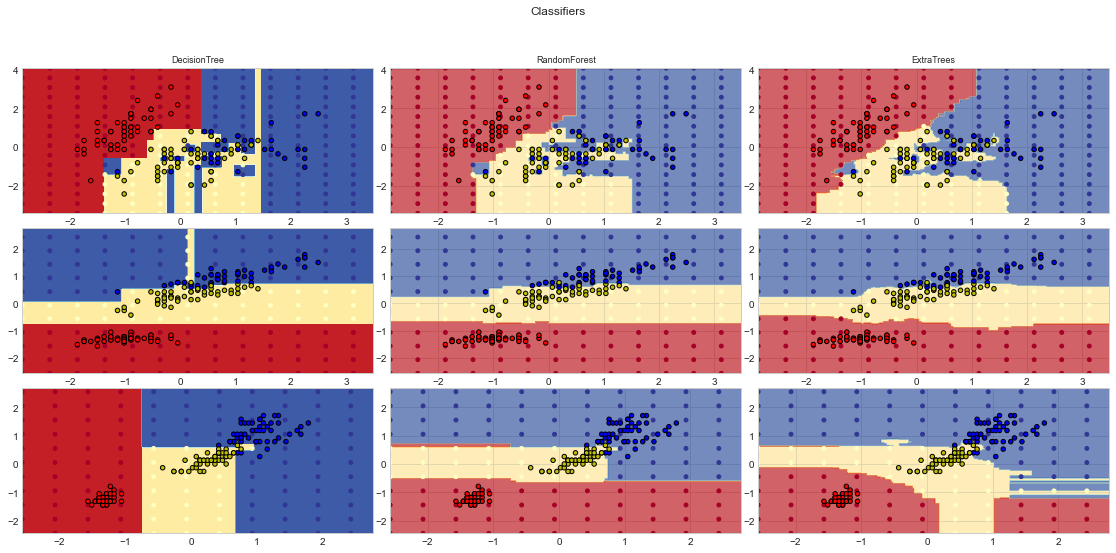

In [105]:
plt.figure(figsize=(16, 8))

for pair in ([0, 1], [0, 2], [2, 3]):
    
    for model in models:
        
        X = iris.data[:, pair]
        y = iris.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        model.fit(X, y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
        
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step),
            np.arange(y_min, y_max, plot_step))
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
        
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser)
        )

        Z_points_coarser = model.predict(np.c_[
            xx_coarser.ravel(),
            yy_coarser.ravel()
        ]).reshape(xx_coarser.shape)

        cs_points = plt.scatter(
            xx_coarser, yy_coarser, s=15,
            c=Z_points_coarser, cmap=cmap,
            edgecolors=None
        )

        plt.scatter(
            X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(["r", "y", "b"]),
            edgecolors="k", s=20)
        plot_idx += 1

plt.suptitle("Classifiers", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [120]:
plot_idx = 1
models = [
    DecisionTreeRegressor(max_depth=None),
    RandomForestRegressor(n_estimators=n_estimators),
    ExtraTreesRegressor(n_estimators=n_estimators)
]

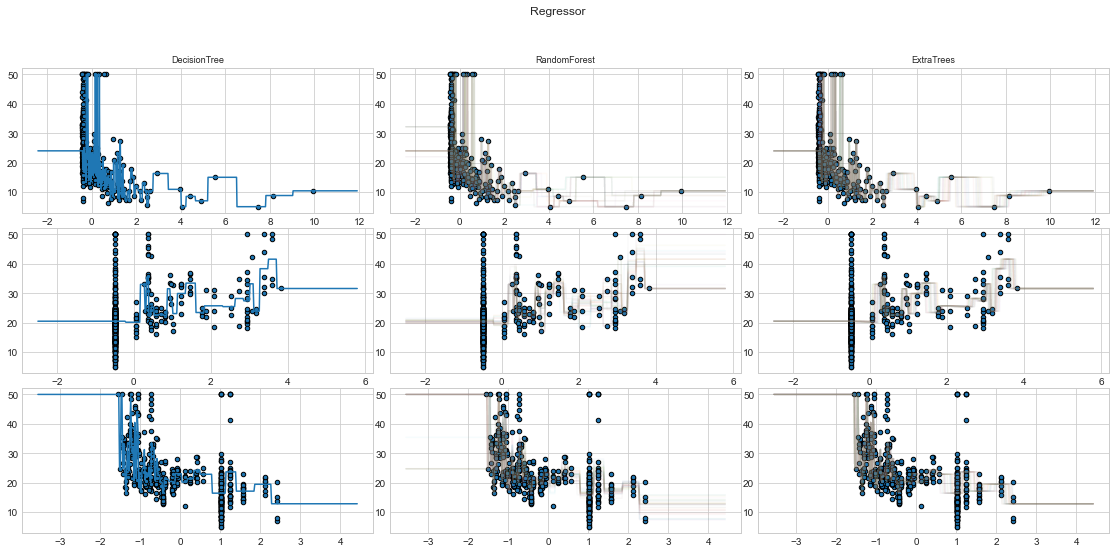

In [121]:
plt.figure(figsize=(16, 8))

for pair in (0, 1, 2):
    
    for model in models:
        
        X = boston.data[:, pair]
        y = boston.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        model.fit(X.reshape(-1, 1), y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Regressor")]
        
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
        
        x_min, x_max = X.min() - 1, X.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.arange(x_min - 1, x_max + 1, plot_step), np.arange(y_min - 1 , y_max + 1, plot_step)
        
        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1, 1))
            cs = plt.plot(xx, Z)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1, 1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)
        
        plt.scatter(X, y, edgecolors="k", s=20)
        plot_idx += 1

plt.suptitle("Regressor", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

## AdaBoost(54분29초)

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

### AdaBoost 분류

### AdaBoost 회귀

## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

### Gradient Tree Boosting 분류

### Gradient Tree Boosting 회귀

## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

### 결정 경계 시각화

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

### 회귀식 시각화

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

#### 회귀식 시각화

### 스택 분류

#### 결정 경계 시각화